In [1]:
from pandas import DataFrame
%matplotlib inline
from datetime import datetime
from IPython import display


import numpy as np
from matplotlib import pyplot as plt

from benchmark import run_benchmark, run_benchmark_comparison
from lowcarb.carbon_sdk_webapi import CarbonSDK_WebAPI

try:
    plt.style.use('../util//matplotlib_stylesheet.mplstyle')
except OSError:
    pass

Using the public CarbonSDK_WebAPI from the hackathon. Appears to have the full access to worldwide data

In [2]:
api = CarbonSDK_WebAPI('https://carbon-aware-api.azurewebsites.net')

# Multi Region Benchmarks

In [3]:
config = {
    'selected_regions': ['westcentralus', 'ukwest', 'uksouth', 'westeurope', 'westus', 'australiacentral', 'australiaeast', 'swedencentral', 'norwaywest', 'norwayeast', 'northeurope', 'centralus', 'francesouth', 'francecentral'],
    'sim_start': datetime(year=2022, day=5, month=10, hour=0, minute=0, second=0),
    'sim_end': datetime(year=2022, day=9, month=10, hour=0, minute=0, second=0),
    'round_time': 12,   ###scheduling window in hours
    'windowSize': 60,   ###workload durating in minutes
    'num_clients': 7,
}

## Random Client Selection

In [4]:
###### this client selector selects random 3 clients
def random_select_clients(api, config: dict, i_round: int, round_start_time: datetime, available_clients: DataFrame, num_clients: int) -> DataFrame:
    selected_clients = available_clients.sample(num_clients)
    selected_clients.loc[:, 'scheduled_time'] = np.zeros(num_clients)
    return selected_clients

In [5]:
result = run_benchmark(api, config, random_select_clients)
print(f'Total training emission: {result["emissions_total"].sum()}')

,region,trained,untrained_since,emissions_total,emissions_1,emissions_2,emissions_3,emissions_4,emissions_5,emissions_6,emissions_7,emissions_8
0,westcentralus,4,0,2312.735197,NaN,NaN,591.711247,593.053124,NaN,593.903610,NaN,534.067216
1,ukwest,3,2,1122.376520,NaN,357.260690,NaN,374.100307,NaN,391.015523,NaN,NaN
2,uksouth,5,0,1735.349909,NaN,357.260690,NaN,374.100307,313.243331,NaN,338.020814,352.724767
3,westeurope,4,0,1700.687892,NaN,462.002729,341.139262,NaN,415.301614,NaN,NaN,482.244288
4,westus,3,1,1241.444517,413.978636,NaN,NaN,NaN,417.342780,NaN,410.123101,NaN
5,australiacentral,5,2,3254.109462,735.103135,508.439247,524.333880,NaN,744.534076,741.699124,NaN,NaN
6,australiaeast,4,1,2718.568070,NaN,NaN,524.333880,NaN,744.534076,741.699124,708.000991,NaN
7,swedencentral,5,2,2644.972708,545.293627,458.808682,NaN,499.159504,586.986326,554.724569,NaN,NaN
8,norwaywest,5,0,2803.522141,575.495319,524.938670,NaN,545.199129,NaN,583.697781,NaN,574.191241
9,norwayeast,3,1,1707.510678,NaN,NaN,570.827098,545.199129,NaN,NaN,591.484450,NaN


Total training emission: 27447.101104884998


## Round Robin Client Selection

In [6]:
####this client selector selects always the 3 least trained clients
def round_robin_select_clients(api, config: dict, i_round: int, round_start_time: datetime, available_clients: DataFrame, num_clients: int) -> DataFrame:
    selected_clients = available_clients.sort_values(by='untrained_since', ascending=False).iloc[0:num_clients]
    selected_clients.loc[:, 'scheduled_time'] = np.zeros(num_clients)
    return selected_clients

In [7]:
result = run_benchmark(api, config, round_robin_select_clients)
print(f'Total training emission: {result["emissions_total"].sum()}')

,region,trained,untrained_since,emissions_total,emissions_1,emissions_2,emissions_3,emissions_4,emissions_5,emissions_6,emissions_7,emissions_8
0,westcentralus,4,1,2378.506091,593.998108,NaN,591.711247,NaN,601.633580,NaN,591.163156,NaN
1,ukwest,4,1,1324.281824,344.862499,NaN,328.155180,NaN,313.243331,NaN,338.020814,NaN
2,uksouth,4,1,1324.281824,344.862499,NaN,328.155180,NaN,313.243331,NaN,338.020814,NaN
3,westeurope,4,1,1576.781577,405.039087,NaN,341.139262,NaN,415.301614,NaN,415.301614,NaN
4,westus,4,1,1655.064060,413.978636,NaN,413.619542,NaN,417.342780,NaN,410.123101,NaN
5,australiacentral,4,1,2711.972081,735.103135,NaN,524.333880,NaN,744.534076,NaN,708.000991,NaN
6,australiaeast,4,1,2711.972081,735.103135,NaN,524.333880,NaN,744.534076,NaN,708.000991,NaN
7,swedencentral,4,0,2065.924249,NaN,458.808682,NaN,499.159504,NaN,554.724569,NaN,553.231494
8,norwaywest,4,0,2228.026822,NaN,524.938670,NaN,545.199129,NaN,583.697781,NaN,574.191241
9,norwayeast,4,0,2228.026822,NaN,524.938670,NaN,545.199129,NaN,583.697781,NaN,574.191241


Total training emission: 26998.25255508792


## Forecast Client Selection

In [8]:
#### this client selector selects the optimum based on the forecast and gives the optimum delay
def forecast_client_selection(api, config: dict, i_round: int, round_start_time: datetime, available_clients: DataFrame, num_clients: int) -> DataFrame:
    scheduled_times = api\
        .get_historic_forecast_batch(regions=available_clients.loc[:, 'region'].to_list(),
                                     start_time=round_start_time, windowSize=config['windowSize'],
                                     roundtime=config['round_time'])\
        .groupby('region', group_keys=True)\
        .apply(lambda df: df.iloc[df['value'].idxmin()][['value', 'timestamp_indv']])

    selected_clients = available_clients\
                           .merge(scheduled_times, on='region')\
                           .rename(columns={'timestamp_indv': 'scheduled_time'})\
                           .sort_values('value', ascending=True)\
                           .iloc[0:num_clients][['region', 'scheduled_time']]

    return selected_clients

In [9]:
result = run_benchmark(api, config, forecast_client_selection)
print(f'Total training emission: {result["emissions_total"].sum()}')

,region,trained,untrained_since,emissions_total,emissions_1,emissions_2,emissions_3,emissions_4,emissions_5,emissions_6,emissions_7,emissions_8
0,westcentralus,0,8,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ukwest,8,0,2845.781830,332.917900,338.115312,316.134982,383.398951,370.584966,386.725295,374.799595,343.104829
2,uksouth,8,0,2845.781830,332.917900,338.115312,316.134982,383.398951,370.584966,386.725295,374.799595,343.104829
3,westeurope,8,0,2979.440382,382.926459,330.744436,360.341339,373.986909,379.165422,375.971376,379.978108,396.326333
4,westus,8,0,2957.119857,373.835712,386.781994,377.747946,382.586264,384.514032,410.312098,389.805943,251.535869
5,australiacentral,0,8,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,australiaeast,0,8,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,swedencentral,7,0,4080.138967,NaN,588.214805,610.535330,591.408852,596.851960,554.724569,583.962377,554.441074
8,norwaywest,0,8,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,norwayeast,0,8,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Total training emission: 19787.32455205917


## Weighted selection

### 3 Clients

In [35]:
max(-3, 0)

0

In [43]:
##### this client selector selects the best from the forecast, however, priotizes clients with untrained rounds higher than 3
def weighted_client_selection(api, config: dict, i_round: int, round_start_time: datetime, available_clients: DataFrame, num_clients: int) -> DataFrame:
    untrained_treshold = 3

    scheduled_times = api\
        .get_historic_forecast_batch(regions=available_clients.loc[:, 'region'].to_list(),
                                     start_time=round_start_time, windowSize=config['windowSize'],
                                     roundtime=config['round_time'])\
        .groupby('region', group_keys=True)\
        .apply(lambda df: df.iloc[df['value'].idxmin()][['value', 'timestamp_indv']])



    merged_clients = available_clients\
                           .merge(scheduled_times, on='region')\
                           .rename(columns={'timestamp_indv': 'scheduled_time'})\
                           .sort_values(['value'], ascending=[True])\


    untrained_clients_indices = merged_clients.query(f'untrained_since >= {untrained_treshold}').index

    if len(untrained_clients_indices) > num_clients:
        return merged_clients.loc[untrained_clients_indices].sort_values(['untrained_since', 'value'], ascending=[False, True]).iloc[0:num_clients][['region', 'scheduled_time']]

    else:
        n_remaining = max(0, num_clients - len(untrained_clients_indices))

        fill_up = merged_clients.query(f'untrained_since < {untrained_treshold}')[:n_remaining].index
        selected_clients_list_indices = list(untrained_clients_indices.values) + list(fill_up.values)

        return merged_clients.loc[selected_clients_list_indices].iloc[0:num_clients][['region', 'scheduled_time']]

In [20]:
config_for_weighted_selection_3_clients = {
    'selected_regions': ['westcentralus', 'ukwest', 'uksouth', 'westeurope', 'westus', 'australiacentral', 'australiaeast', 'swedencentral', 'norwaywest', 'norwayeast', 'northeurope', 'centralus', 'francesouth', 'francecentral'],
    'sim_start': datetime(year=2022, day=5, month=10, hour=0, minute=0, second=0),
    'sim_end': datetime(year=2022, day=9, month=10, hour=0, minute=0, second=0),
    'round_time': 3,   ###scheduling window in hours
    'windowSize': 60,   ###workload durating in minutes
    'num_clients': 3,
}

In [21]:
result = run_benchmark(api, config_for_weighted_selection_3_clients, weighted_client_selection)
print(f'Total training emission: {result["emissions_total"].sum()}')

,region,trained,untrained_since,emissions_total,emissions_1,emissions_2,emissions_3,emissions_4,emissions_5,emissions_6,...,emissions_23,emissions_24,emissions_25,emissions_26,emissions_27,emissions_28,emissions_29,emissions_30,emissions_31,emissions_32
0,westcentralus,6,1,3136.194345,NaN,NaN,NaN,NaN,NaN,640.755922,...,NaN,NaN,NaN,538.470842,NaN,NaN,NaN,NaN,625.277082,NaN
1,ukwest,9,3,2923.176028,314.509610,361.380821,337.756219,NaN,NaN,NaN,...,NaN,NaN,303.037503,NaN,NaN,NaN,311.731356,NaN,NaN,NaN
2,uksouth,6,4,1977.057943,NaN,NaN,NaN,300.334848,NaN,NaN,...,362.533702,NaN,NaN,NaN,NaN,341.195961,NaN,NaN,NaN,NaN
3,westeurope,6,4,2062.579005,NaN,NaN,NaN,349.587419,NaN,NaN,...,341.611754,NaN,NaN,NaN,NaN,345.580687,NaN,NaN,NaN,NaN
4,westus,7,2,2363.613141,NaN,NaN,NaN,362.155708,NaN,NaN,...,NaN,NaN,NaN,370.906261,NaN,NaN,NaN,161.535583,NaN,NaN
5,australiacentral,6,0,4005.617520,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,628.622326,NaN,NaN,NaN,NaN,680.388555
6,australiaeast,6,0,4005.617520,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,628.622326,NaN,NaN,NaN,NaN,680.388555
7,swedencentral,6,3,3068.665781,NaN,NaN,NaN,NaN,444.804018,NaN,...,NaN,566.574669,NaN,NaN,NaN,NaN,504.678211,NaN,NaN,NaN
8,norwaywest,6,2,3111.076668,NaN,NaN,NaN,NaN,477.821762,NaN,...,NaN,NaN,536.788771,NaN,NaN,NaN,NaN,486.269920,NaN,NaN
9,norwayeast,6,2,3176.129373,NaN,NaN,NaN,NaN,NaN,542.874468,...,NaN,NaN,536.788771,NaN,NaN,NaN,NaN,486.269920,NaN,NaN


Total training emission: 40347.249208002926


In [22]:
benchmark_comparison = run_benchmark_comparison(api, config_for_weighted_selection_3_clients)

,region,emission_total
0,westcentralus,63658.334150
1,ukwest,41113.512764
2,uksouth,41113.512764
3,westeurope,42677.740943
4,westus,39866.445305
5,australiacentral,76924.188810
6,australiaeast,76924.188810
7,swedencentral,62553.110523
8,norwaywest,61477.951708
9,norwayeast,61477.951708


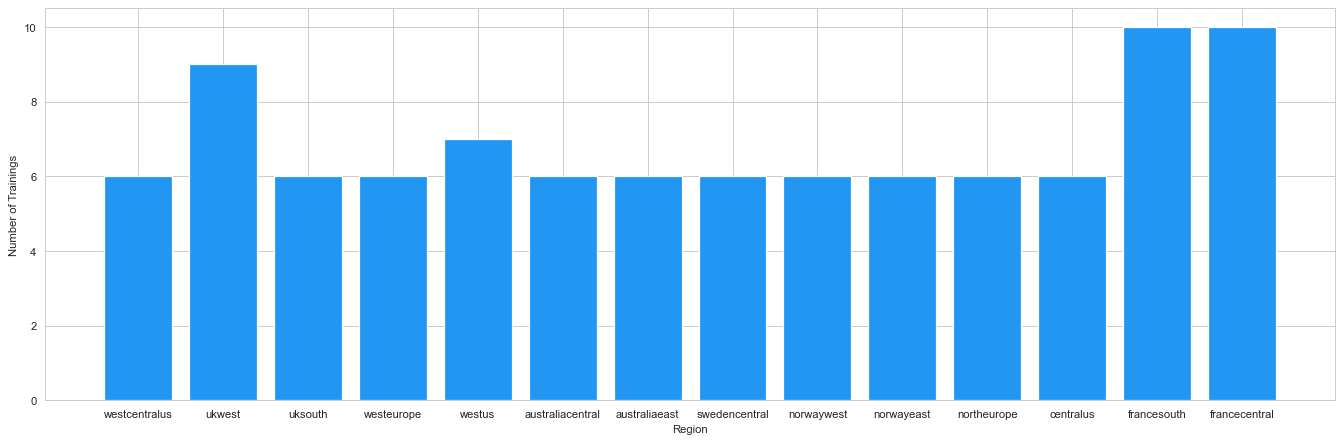

In [23]:
weighted_learning_result_plot = plt.figure(figsize=(15, 5))
weighted_learning_result_plot.set_tight_layout(True)
weighted_learning_result_plot_ax1 = weighted_learning_result_plot.add_subplot(1, 1, 1)
weighted_learning_result_plot_ax1.set_xlabel('Region')
weighted_learning_result_plot_ax1.set_ylabel('Number of Trainings')


weighted_learning_result_plot_ax1.bar(result['region'],result['trained']);

### 7 Clients (half of all available clients)

In [29]:
config_for_weighted_selection_7_clients = {
    'selected_regions': ['westcentralus', 'ukwest', 'uksouth', 'westeurope', 'westus', 'australiacentral', 'australiaeast', 'swedencentral', 'norwaywest', 'norwayeast', 'northeurope', 'centralus', 'francesouth', 'francecentral'],
    'sim_start': datetime(year=2022, day=5, month=10, hour=0, minute=0, second=0),
    'sim_end': datetime(year=2022, day=9, month=10, hour=0, minute=0, second=0),
    'round_time': 3,   ###scheduling window in hours
    'windowSize': 60,   ###workload durating in minutes
    'num_clients': 7,
}

In [44]:
result = run_benchmark(api, config_for_weighted_selection_7_clients, weighted_client_selection)
print(f'Total training emission: {result["emissions_total"].sum()}')

,region,trained,untrained_since,emissions_total,emissions_1,emissions_2,emissions_3,emissions_4,emissions_5,emissions_6,...,emissions_23,emissions_24,emissions_25,emissions_26,emissions_27,emissions_28,emissions_29,emissions_30,emissions_31,emissions_32
0,westcentralus,8,0,3883.185380,NaN,NaN,NaN,503.411932,NaN,NaN,...,NaN,465.990561,NaN,NaN,NaN,503.582029,NaN,NaN,NaN,479.088041
1,ukwest,24,1,8311.040698,314.509610,361.380821,337.756219,NaN,306.174850,370.414869,...,362.533702,NaN,303.037503,355.011628,364.348071,NaN,311.731356,375.309887,379.146522,NaN
2,uksouth,24,1,8311.040698,314.509610,361.380821,337.756219,NaN,306.174850,370.414869,...,362.533702,NaN,303.037503,355.011628,364.348071,NaN,311.731356,375.309887,379.146522,NaN
3,westeurope,24,1,8982.773198,380.072607,321.143398,411.767374,NaN,420.083234,366.653832,...,341.611754,NaN,377.540049,372.267038,376.519466,NaN,439.077414,364.385871,360.322439,NaN
4,westus,24,1,8174.433796,375.952476,366.332538,340.969164,NaN,370.509368,342.386641,...,321.218997,NaN,371.851245,370.906261,353.461854,NaN,372.493834,161.535583,229.990231,NaN
5,australiacentral,8,0,5312.247041,NaN,NaN,NaN,639.243947,NaN,NaN,...,NaN,680.388555,NaN,NaN,NaN,663.076446,NaN,NaN,NaN,680.388555
6,australiaeast,8,0,5312.247041,NaN,NaN,NaN,639.243947,NaN,NaN,...,NaN,680.388555,NaN,NaN,NaN,663.076446,NaN,NaN,NaN,680.388555
7,swedencentral,12,2,5889.670128,NaN,NaN,NaN,499.783193,444.804018,419.875337,...,NaN,NaN,530.929869,NaN,NaN,NaN,504.678211,493.319502,NaN,NaN
8,norwaywest,8,0,4190.154016,NaN,NaN,NaN,494.169987,NaN,NaN,...,NaN,547.240295,NaN,NaN,NaN,494.453483,NaN,NaN,NaN,548.034081
9,norwayeast,8,0,4190.154016,NaN,NaN,NaN,494.169987,NaN,NaN,...,NaN,547.240295,NaN,NaN,NaN,494.453483,NaN,NaN,NaN,548.034081


Total training emission: 85701.55339097918


In [45]:
benchmark_comparison = run_benchmark_comparison(api, config_for_weighted_selection_7_clients)

,region,emission_total
0,westcentralus,149397.229876
1,ukwest,97060.093371
2,uksouth,97060.093371
3,westeurope,98674.524260
4,westus,92548.576034
5,australiacentral,173020.635500
6,australiaeast,173020.635500
7,swedencentral,142253.806383
8,norwaywest,142919.932551
9,norwayeast,142919.932551


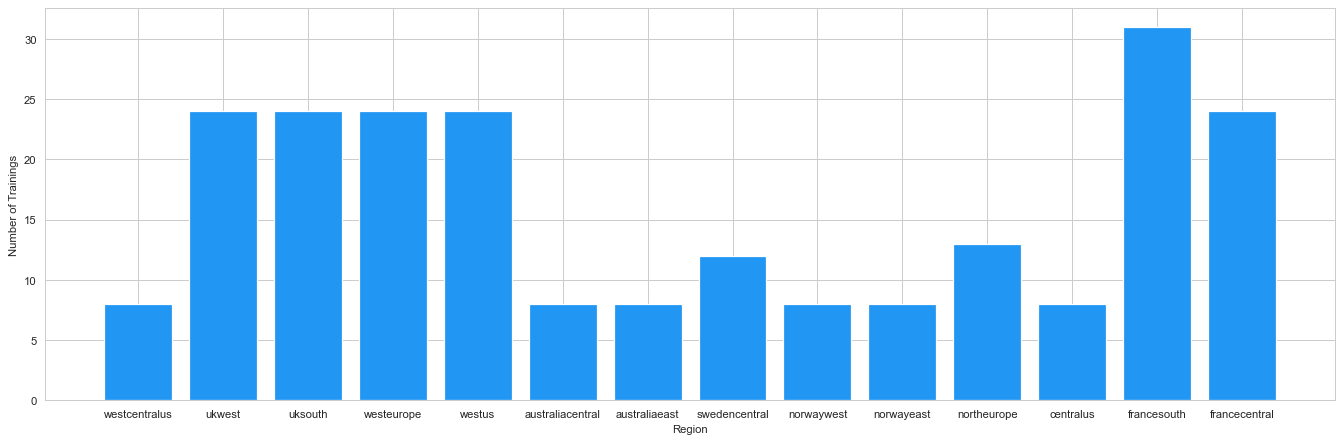

In [46]:
weighted_learning_result_plot2 = plt.figure(figsize=(15, 5))
weighted_learning_result_plot2.set_tight_layout(True)
weighted_learning_result_plot_ax1 = weighted_learning_result_plot2.add_subplot(1, 1, 1)
weighted_learning_result_plot_ax1.set_xlabel('Region')
weighted_learning_result_plot_ax1.set_ylabel('Number of Trainings')


weighted_learning_result_plot_ax1.bar(result['region'],result['trained']);

## Comparison Benchmark
**run_benchmark_comparison calculates the emission if the complete workload is done in one region all at once**

In [47]:
benchmark_comparison = run_benchmark_comparison(api, config)

,region,emission_total
0,westcentralus,37258.627463
1,ukwest,23927.747205
2,uksouth,23927.747205
3,westeurope,24973.084421
4,westus,23345.905792
5,australiacentral,44946.814437
6,australiaeast,44946.814437
7,swedencentral,36353.023996
8,norwaywest,35739.901509
9,norwayeast,35739.901509


# Single Region Benchmarks

## Forecast Client Selection

In [48]:
config_single_region = {
    'selected_regions': ['norwayeast'],
    'sim_start': datetime(year=2022, day=5, month=10, hour=0, minute=0, second=0),
    'sim_end': datetime(year=2022, day=9, month=10, hour=0, minute=0, second=0),
    'round_time': 12,   ###scheduling window in hours
    'windowSize': 60,   ###workload durating in minutes
    'num_clients': 1,
}

In [49]:
result = run_benchmark(api, config_single_region, forecast_client_selection)
print(f'Total training emission: {result["emissions_total"].sum()}')

,region,trained,untrained_since,emissions_total,emissions_1,emissions_2,emissions_3,emissions_4,emissions_5,emissions_6,emissions_7,emissions_8
0,norwayeast,8,0,4488.523297,543.271361,579.086259,570.657001,542.307478,592.731829,581.543218,543.895051,535.0311


Total training emission: 4488.523297335


In [50]:
benchmark_comparison = run_benchmark_comparison(api, config_single_region)

,region,emission_total
0,norwayeast,5103.892746
